Provo a runnare i codici di esempio (il modello fa volutamente schifo) 

In [ ]:
# This file contains functions for training models for the 2022 Challenge. You can run it as follows:
#
#   python train_model.py data model
#
# where 'data' is a folder containing the Challenge data and 'model' is a folder for saving your model.

In [12]:
!python train_model.py C:\Users\giuli\Desktop\challenge\python-classifier-2022-master\the-circor-digiscope-phonocardiogram-dataset-1.0.1\training_data C:\Users\giuli\Desktop\challenge\python-classifier-2022-master\model

Finding data files...
Extracting features and labels from the Challenge data...
Training model...
Done.


In [ ]:
# python run_model.py model data outputs
#
# where 'model' is a folder containing the your trained model, 'data' is a folder containing the Challenge data, and 'outputs' is a
# folder for saving your model's outputs.

In [14]:
!python run_model.py C:\Users\giuli\Desktop\challenge\python-classifier-2022-master\model C:\Users\giuli\Desktop\challenge\python-classifier-2022-master\the-circor-digiscope-phonocardiogram-dataset-1.0.1\training_data C:\Users\giuli\Desktop\challenge\python-classifier-2022-master\output

Loading Challenge model...
Running model on Challenge data...
Done.


Provo a vedere come è andata

In [4]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
from os import listdir
from os.path import isfile, join
from helper_code import *

In [51]:
# load true labels
data = r"C:\Users\giuli\Desktop\challenge\python-classifier-2022-master\the-circor-digiscope-phonocardiogram-dataset-1.0.1\training_data"
patient_files=find_patient_files(data)
num_patient_files = len(patient_files)
label = []
for i in range (num_patient_files):
    patient_data = load_patient_data(patient_files[i])
    label.append(get_label(patient_data))

In [46]:
#load predicted labels
mypath= r"C:\Users\giuli\Desktop\challenge\python-classifier-2022-master\output"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
pred_label = []
for i in range(len(onlyfiles)):
    a = load_challenge_outputs(mypath + "\\" + onlyfiles[i])
    for j in range(0,3):
        if a[2][j] == 1:
            pred_label.append(a[1][j])


In [58]:
cm = pd.DataFrame(confusion_matrix(label,pred_label))

In [60]:
cm

,0,1,2
0,630,54,11
1,158,15,6
2,58,8,2


In [63]:
recap_path= r"C:\Users\giuli\Desktop\challenge\python-classifier-2022-master\the-circor-digiscope-phonocardiogram-dataset-1.0.1\training_data.csv"
tabella=pd.read_csv(recap_path)

I dati sono molto sblianciati!

In [64]:
tabella

,Patient ID,Locations,Age,Sex,Height,Weight,Pregnancy status,Murmur,Murmur locations,Most audible location,...,Systolic murmur grading,Systolic murmur pitch,Systolic murmur quality,Diastolic murmur timing,Diastolic murmur shape,Diastolic murmur grading,Diastolic murmur pitch,Diastolic murmur quality,Campaign,Additional ID
0,2530,AV+PV+TV+MV,Child,Female,98.0,15.9,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC2015,NaN
1,9979,AV+PV+TV+MV,Child,Female,103.0,13.1,False,Present,AV+MV+PV+TV,TV,...,III/VI,High,Harsh,NaN,NaN,NaN,NaN,NaN,CC2015,NaN
2,9983,AV+PV+TV+MV,Child,Male,115.0,19.1,False,Unknown,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC2015,NaN
3,13918,AV+PV+TV+MV,Child,Male,98.0,15.9,False,Present,TV,TV,...,I/VI,Low,Blowing,NaN,NaN,NaN,NaN,NaN,CC2015,NaN
4,14241,AV+PV+TV+MV,Child,Male,87.0,11.2,False,Present,AV+MV+PV+TV,PV,...,II/VI,Low,Harsh,NaN,NaN,NaN,NaN,NaN,CC2015,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,85340,AV+PV+TV+MV,Child,Male,105.0,16.6,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC2015,NaN
938,85341,AV+PV+TV+MV,Child,Male,92.0,15.2,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC2015,NaN
939,85343,AV+PV+TV+MV,Child,Female,97.0,13.5,False,Present,MV+TV,TV,...,I/VI,Low,Blowing,NaN,NaN,NaN,NaN,NaN,CC2015,NaN
940,85345,AV+PV,Child,Female,132.0,38.1,False,Absent,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CC2015,NaN


<AxesSubplot:>

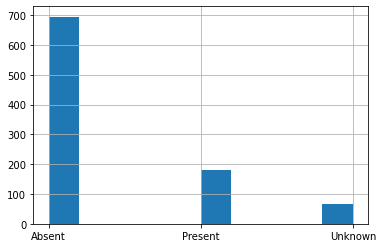

In [66]:
tabella["Murmur"].hist()

In [5]:
path_canc = r"C:\Users\giuli\Desktop\challenge\python-classifier-2022-master\the-circor-digiscope-phonocardiogram-dataset-1.0.1\training_data\2530_AV.wav"
recording, frequency = load_wav_file(path_canc)

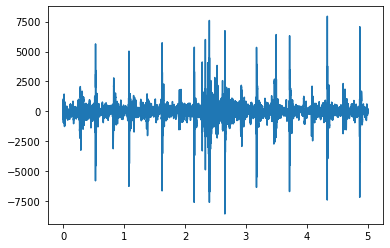

In [6]:
import matplotlib.pyplot as plt
L=len(recording)
tempo = np.arange(0,L/frequency,1/frequency)
plt.plot(tempo[0:5*frequency],recording[0:5*frequency])


In [12]:
frequency

4000

In [2]:
import numpy as np
window_size = 4000
groups = [np.arange(i, i + 5) for i in range(0, 11, 5)]

In [12]:
from pyts.decomposition import SingularSpectrumAnalysis
ssa = SingularSpectrumAnalysis(window_size=4)
X_ssa = ssa.fit_transform(recording.reshape(-1, 1))

ValueError: If 'window_size' is an integer, it must be greater than or equal to 2 and lower than or equal to n_timestamps (got 4).

In [20]:
from scipy import signal
f, Pxx = signal.welch(recording, frequency)

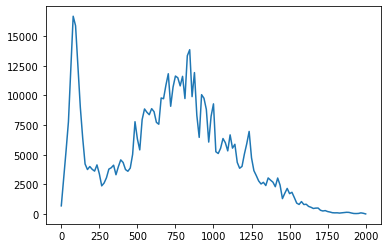

In [21]:
plt.plot(f,Pxx)

In [37]:
from pyts.image import RecurrencePlot
rp = RecurrencePlot(dimension=2, time_delay=1000)
X_rp = rp.transform(np.array([recording]))


MemoryError: Unable to allocate 32.5 GiB for an array with shape (1, 93400, 93400, 2) and data type int16

In [ ]:
X_rp.shape